In [ ]:
import numpy as np #https://github.com/numpy/numpy 1) 
import matplotlib.pyplot as plt #https://github.com/matplotlib/matplotlib
import scipy.stats as st #https://github.com/scipy/scipy
import pandas as pd 


## https://github.com/pandas-dev/pandas 
## Pandas is a fast, powerful,  flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.


In [24]:
df = pd.read_csv('Data.csv')
df

h   m      s         RA   d  m.1   s.1        DEC     F60    F100  \
0    4  40  20.32  70.084667  45   12  36.8  45.210222  4.9004  23.223   
1    4  40  19.95  70.083125  45   11   9.7  45.186028  4.8348  22.769   
2    4  40  22.20  70.092500  45    9  42.5  45.161806  5.0315  22.565   
3    4  40  21.08  70.087833  45    8   3.5  45.134306  5.8450  22.914   
4    4  40  23.71  70.098792  45    2  15.1  45.037528  4.9721  22.856   
..  ..  ..    ...        ...  ..  ...   ...        ...     ...     ...   
195  4  37  53.17  69.471542  45    1  52.4  45.031222  4.7870  23.138   
196  4  37  53.24  69.471833  45    0  29.3  45.008139  4.7069  22.922   
197  4  37  53.68  69.473667  44   59   2.2  44.983944  4.5735  22.614   
198  4  37  56.37  69.484875  44   57  15.5  44.954306  4.6398  23.243   
199  4  37  44.64  69.436000  45    0  36.4  45.010111  4.8512  23.385   

            Td             B             M  
0    23.357923  8.397450e-16  2.624653e+28  
1    23.393590  8.476872e-16  2.598671e+28  
2    23.675585  9.122802e-16  2.413380e+28  
3    24.487987  1.116684e-15  1.970421e+28  
4    23.532299  8.790589e-16  2.497695e+28  
..         ...           ...           ...  
195  23.246238  8.152016e-16  2.692970e+28  
196  23.204123  8.060747e-16  2.722065e+28  
197  23.119057  7.878520e-16  2.783528e+28  
198  23.046670  7.725681e-16  2.836725e+28  
199  23.261467  8.185192e-16  2.680797e+28  

[200 rows x 13 columns]

In [2]:
df.describe()

h          m           s          RA           d         m.1  \
count  200.0  200.00000  200.000000  200.000000  200.000000  200.000000   
mean     4.0   38.72000   29.227200   69.801780   44.730000   19.615000   
std      0.0    0.75794   17.693744    0.169578    0.445074   23.201039   
min      4.0   37.00000    0.010000   69.436000   44.000000    0.000000   
25%      4.0   38.00000   13.590000   69.659458   44.000000    3.000000   
50%      4.0   39.00000   28.975000   69.798937   45.000000    8.000000   
75%      4.0   39.00000   45.262500   69.949406   45.000000   54.000000   
max      4.0   40.00000   59.980000   70.103500   45.000000   59.000000   

              s.1         DEC         F60        F100          Td  \
count  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    26.201000   45.064195    4.549389   22.153490   23.200885   
std     17.228526    0.088033    0.249222    0.718893    0.196075   
min      0.100000   44.876889    4.051400   20.901000   22.838878   
25%     10.500000   44.989583    4.365625   21.509000   23.081515   
50%     22.750000   45.051667    4.528500   22.166500   23.204056   
75%     39.850000   45.138542    4.704800   22.780000   23.292709   
max     59.700000   45.256361    5.845000   23.385000   24.487987   

                  B             M  
count  2.000000e+02  2.000000e+02  
mean   8.061341e-16  2.732409e+28  
std    4.369863e-17  1.338126e+27  
min    7.298215e-16  1.970421e+28  
25%    7.798998e-16  2.665628e+28  
50%    8.060603e-16  2.727378e+28  
75%    8.253539e-16  2.814424e+28  
max    1.116684e-15  3.005047e+28

In [3]:
RA=np.round(df.RA,2)
DEC=np.round(df.DEC,2)
RA,DEC

(0      70.08
 1      70.08
 2      70.09
 3      70.09
 4      70.10
        ...  
 195    69.47
 196    69.47
 197    69.47
 198    69.48
 199    69.44
 Name: RA, Length: 200, dtype: float64,
 0      45.21
 1      45.19
 2      45.16
 3      45.13
 4      45.04
        ...  
 195    45.03
 196    45.01
 197    44.98
 198    44.95
 199    45.01
 Name: DEC, Length: 200, dtype: float64)

0.26939752500153713
-1.4187063761463028
0.7770894968043595
1.115111700017243e-41
0.015506360749501104


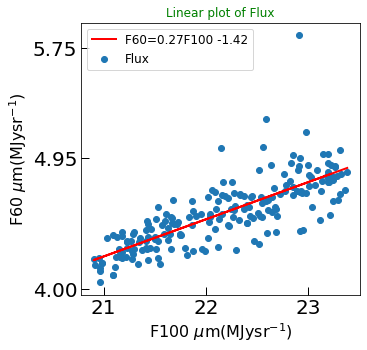

In [4]:
from scipy import stats
F60 = df['F60']
F100 = df['F100']
fig,ax=plt.subplots(figsize=(5,5))
slope, intercept, r, p, std_err = stats.linregress(F100,F60)


def myfunc(F100):
    return slope * F100 + intercept

mymodel = list(map(myfunc, F100))

plt.scatter(F100,F60)
plt.plot(F100,mymodel,c='r',linewidth=2)
plt.title("Linear plot of Flux",c='g',fontsize=12)
plt.legend(["F60=0.27F100 -1.42","Flux"],loc="upper left",prop={"size":12})

plt.xlabel('F100 $\mu$m(MJysr$^{-1}$)', fontsize=16)
plt.ylabel('F60 $\mu$m(MJysr$^{-1}$)', fontsize=16)
plt.xticks (fontsize=20)
plt.yticks(fontsize=20)

ax.set_yticks([4, 4.95,5.75])
ax.set_xticks([21.0, 22.0, 23.0])
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
#plt.text(45, 11.67, r'(b)', fontsize = 20)
plt.savefig('TFigd.png',  bbox_inches='tight',dpi = 600)
print(slope),
print(intercept)
print(r)
print(p)
print(std_err)
plt.show()


In [5]:
df.describe()

h          m           s          RA           d         m.1  \
count  200.0  200.00000  200.000000  200.000000  200.000000  200.000000   
mean     4.0   38.72000   29.227200   69.801780   44.730000   19.615000   
std      0.0    0.75794   17.693744    0.169578    0.445074   23.201039   
min      4.0   37.00000    0.010000   69.436000   44.000000    0.000000   
25%      4.0   38.00000   13.590000   69.659458   44.000000    3.000000   
50%      4.0   39.00000   28.975000   69.798937   45.000000    8.000000   
75%      4.0   39.00000   45.262500   69.949406   45.000000   54.000000   
max      4.0   40.00000   59.980000   70.103500   45.000000   59.000000   

              s.1         DEC         F60        F100          Td  \
count  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    26.201000   45.064195    4.549389   22.153490   23.200885   
std     17.228526    0.088033    0.249222    0.718893    0.196075   
min      0.100000   44.876889    4.051400   20.901000   22.838878   
25%     10.500000   44.989583    4.365625   21.509000   23.081515   
50%     22.750000   45.051667    4.528500   22.166500   23.204056   
75%     39.850000   45.138542    4.704800   22.780000   23.292709   
max     59.700000   45.256361    5.845000   23.385000   24.487987   

                  B             M  
count  2.000000e+02  2.000000e+02  
mean   8.061341e-16  2.732409e+28  
std    4.369863e-17  1.338126e+27  
min    7.298215e-16  1.970421e+28  
25%    7.798998e-16  2.665628e+28  
50%    8.060603e-16  2.727378e+28  
75%    8.253539e-16  2.814424e+28  
max    1.116684e-15  3.005047e+28

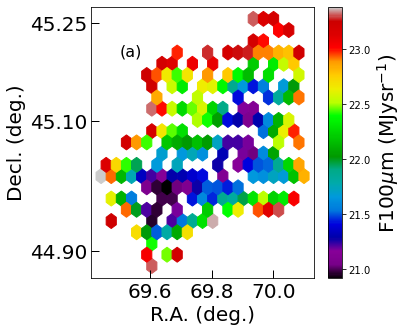

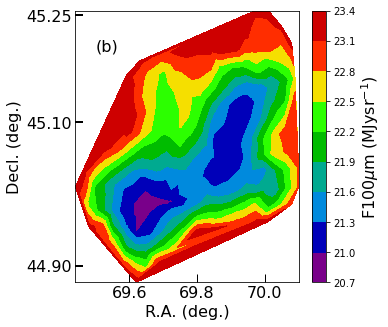

In [6]:
DEC = df['DEC']
DEC = df['DEC']
F100 = df['F100']

fig,ax=plt.subplots(figsize=(5,5))

plt.hexbin(RA, DEC, F100, gridsize=(20),cmap='nipy_spectral')
plt.colorbar().set_label(label = 'F100$\mu$m (MJysr$^{-1}$)',fontsize=20)
#plt.xlim(71.67, 71.46)
plt.ticklabel_format(style='plain')
plt.xlabel('R.A. (deg.)',fontsize=20)
plt.ylabel('Decl. (deg.)',fontsize=20)
plt.tick_params(direction='in')
#plt.xticks(np.arange(71.67, 71.46, 5))
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25])
plt.text(69.5, 45.2, r'(a)', fontsize = 16)
#plt.xticks(np.arange(71.67, 71.46,0.05),np.arange(71.67, 71.46,0.05),color = 'k', fontsize=20)
#ax=plt.axes()
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.savefig('FigCF100.png', bbox_inches='tight')


#cmap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
fig,ax=plt.subplots(figsize=(5,5))
plt.tricontourf(RA, DEC, F100, levels = 8, cmap='nipy_spectral')
plt.colorbar().set_label(label= 'F100$\mu$m (MJysr$^{-1}$)',size=16)

#plt.xlim(71.67, 71.46)
plt.xlabel('R.A. (deg.)',fontsize=16)
plt.ylabel('Decl. (deg.)',fontsize=16)
plt.xticks(color = 'k', fontsize=16)
plt.yticks(color = 'k', fontsize=16)
plt.tick_params(direction='in')
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25])



plt.tick_params(axis='y',length=8,width=2)

plt.text(69.5, 45.2, r'(b)', fontsize = 16)

plt.savefig('FigCF100.png', bbox_inches='tight',dpi = 600)

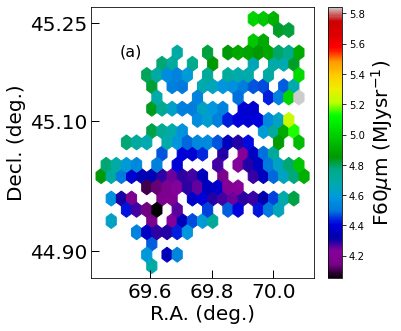

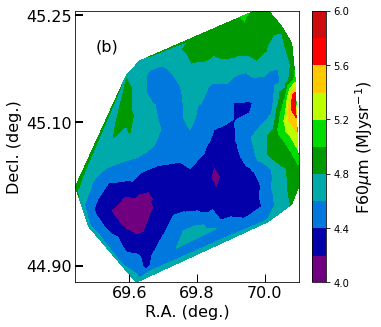

In [7]:
DEC = df['DEC']
DEC = df['DEC']
F60 = df['F60']

fig,ax=plt.subplots(figsize=(5,5))

plt.hexbin(RA, DEC, F60, gridsize=(20),cmap='nipy_spectral')
plt.colorbar().set_label(label = 'F60$\mu$m (MJysr$^{-1}$)',fontsize=20)
#plt.xlim(71.67, 71.46)
plt.ticklabel_format(style='plain')
plt.xlabel('R.A. (deg.)',fontsize=20)
plt.ylabel('Decl. (deg.)',fontsize=20)
plt.tick_params(direction='in')
#plt.xticks(np.arange(71.67, 71.46, 5))
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25])
plt.text(69.5, 45.2, r'(a)', fontsize = 16)
#plt.xticks(np.arange(71.67, 71.46,0.05),np.arange(71.67, 71.46,0.05),color = 'k', fontsize=20)
#ax=plt.axes()
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.savefig('FigCF60.png', bbox_inches='tight')


#cmap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
fig,ax=plt.subplots(figsize=(5,5))
plt.tricontourf(RA, DEC, F60, levels = 8, cmap='nipy_spectral')
plt.colorbar().set_label(label= 'F60$\mu$m (MJysr$^{-1}$)',size=16)

#plt.xlim(71.67, 71.46)
plt.xlabel('R.A. (deg.)',fontsize=16)
plt.ylabel('Decl. (deg.)',fontsize=16)
plt.xticks(color = 'k', fontsize=16)
plt.yticks(color = 'k', fontsize=16)
plt.tick_params(direction='in')
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25])



plt.tick_params(axis='y',length=8,width=2)

plt.text(69.5, 45.2, r'(b)', fontsize = 16)

plt.savefig('FigCF60.png', bbox_inches='tight',dpi = 600)

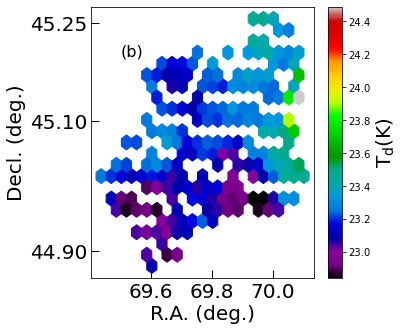

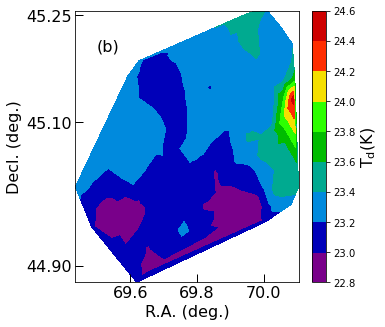

In [8]:
RA = df['RA']
DEC= df['DEC']
T = df['Td']
fig,ax=plt.subplots(figsize=(5,5))
plt.hexbin(RA, DEC, T, gridsize=(20),cmap='nipy_spectral')
plt.colorbar().set_label(label ='T$_{\mathregular{d}}$(K)',size=20)
#plt.xlim(71.671458,71.459208)
#plt.xlim(71.671458, 71.459208)
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25])

plt.xlabel('R.A. (deg.)',fontsize=20)
plt.ylabel('Decl. (deg.)',fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.text(69.5, 45.2, r'(b)', fontsize = 16)
plt.savefig('THFige.png',bbox_inches='tight')
fig,ax=plt.subplots(figsize=(5,5))
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25])         
plt.tricontourf(RA, DEC, T, levels=8,cmap='nipy_spectral')
plt.colorbar().set_label(label ='T$_{\mathregular{d}}$(K)',size=16)
#plt.clabel(r'F90($\mu$m)')
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25]) 
plt.text(69.5, 45.2, r'(b)', fontsize = 16)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
plt.xlabel('R.A. (deg.)',fontsize=16)
plt.ylabel('Decl. (deg.)',fontsize=16)
plt.xticks(color = 'k', fontsize=16)
plt.yticks(color = 'k', fontsize=16)

plt.savefig('TFigf.png',bbox_inches='tight',dpi = 600)

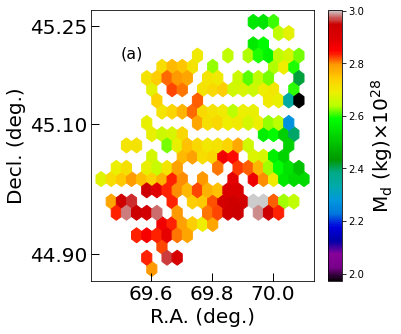

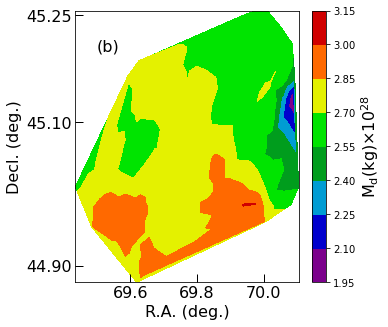

In [9]:
RA = df['RA']
DEC= df['DEC']
M = df['M']*10**-28
fig,ax=plt.subplots(figsize=(5,5))
plt.hexbin(RA, DEC, M, gridsize=(20),cmap='nipy_spectral' )
plt.colorbar().set_label(label= r'M$_{\mathregular{d}}$ (kg)$\times 10^{28}$',size=20)
#plt.xlim(71.671458,71.459208)
#plt.xlim(71.671458, 71.459208)
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25]) 
plt.text(69.5, 45.2, r'(a)', fontsize = 16) 
plt.xlabel('R.A. (deg.)',fontsize=20)
plt.ylabel('Decl. (deg.)',fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.savefig('HMFigg.png',bbox_inches='tight')

fig,ax=plt.subplots(figsize=(5,5))
plt.tricontourf(RA, DEC, M, levels=8, cmap='nipy_spectral')
plt.colorbar().set_label(label= r'M$_{\mathregular{d}}$(kg)$\times 10^{28}$',size=16)
#plt.xlim(71.671458,71.459208)
#plt.xlim(71.671458, 71.459208)
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25]) 
plt.text(69.5, 45.2, r'(b)', fontsize = 16) 
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
plt.xlabel('R.A. (deg.)',fontsize=16)
plt.ylabel('Decl. (deg.)',fontsize=16)
plt.xticks(color = 'k', fontsize=16)
plt.yticks(color = 'k', fontsize=16)
plt.savefig('MFigj.png',bbox_inches='tight',dpi = 600)

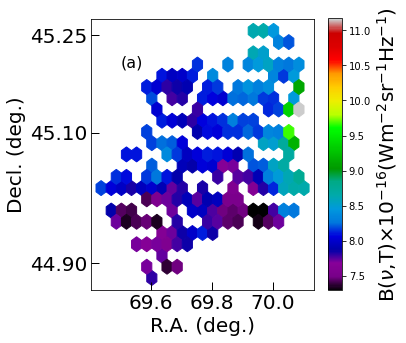

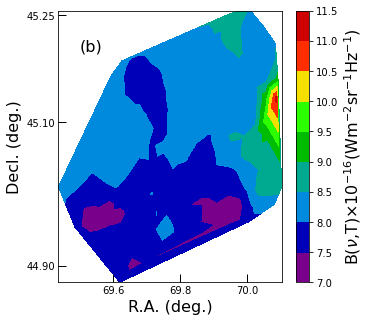

In [10]:
RA = df['RA']
DEC= df['DEC']
B = df['B']*10**16
fig,ax=plt.subplots(figsize=(5,5))
plt.hexbin(RA, DEC, B, gridsize=(20),cmap='nipy_spectral')
plt.colorbar().set_label(label =r'B($\nu$,T)$\times 10^{-16}$(Wm$^{-2}$sr$^{-1}$Hz$^{-1}$)',size=20)
#plt.xlim(71.671458,71.459208)
#plt.xlim(71.671458, 71.459208)
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25]) 
plt.text(69.5, 45.2, r'(a)', fontsize = 16)
plt.xlabel('R.A. (deg.)',fontsize=20)
plt.ylabel('Decl. (deg.)',fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.savefig('TAHP.png',bbox_inches='tight')

fig,ax=plt.subplots(figsize=(5,5))
plt.tricontourf(RA, DEC, B, levels=8, cmap='nipy_spectral')
plt.colorbar().set_label(label = r'B($\nu$,T)$\times 10^{-16}$(Wm$^{-2}$sr$^{-1}$Hz$^{-1}$)',size=16)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
plt.xlabel('R.A. (deg.)',fontsize=16)
plt.ylabel('Decl. (deg.)',fontsize=16)
#plt.xlim(71.671458,71.459208)
#plt.xlim(71.671458, 71.459208)
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25]) 
plt.text(69.5, 45.2, r'(b)', fontsize = 16)
plt.savefig('TACP.png',bbox_inches='tight',dpi = 600)

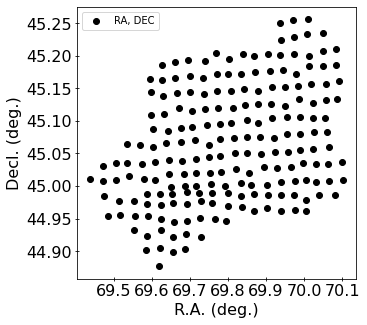

In [11]:
RA = df['RA']
DEC= df['DEC']
plt.figure(figsize=(5,5))
plt.scatter(RA,DEC,color='black')
plt.legend(["RA, DEC"],loc="upper left")
plt.xlabel('R.A. (deg.)',color='k',fontsize=16)
plt.ylabel('Decl. (deg.)',color='k',fontsize=16)
plt.tick_params(direction='inout')#in or out or inout ticks
ax.set_xticks([69.6, 69.8,70.0])
ax.set_yticks([44.9, 45.10, 45.25]) 
plt.xticks(color = 'k',fontsize=16)
plt.yticks(color = 'k',fontsize=16)
plt.savefig('scatterplot ak.png',bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

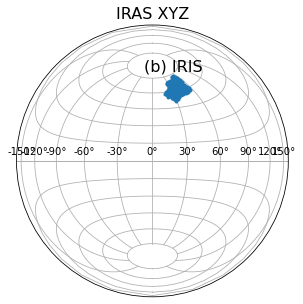

In [12]:
plt.figure()
fig,ax=plt.subplots(figsize=(5,5))

plt.subplot(111, projection="lambert")
plt.title("IRAS XYZ",fontsize = 16)
plt.plot(df.RA, df.DEC,'.')

plt.grid(True)
plt.text(-98, 139.955, r'(b) IRIS', fontsize = 16)
plt.savefig('TAFigb.png',bbox_inches='tight',dpi = 600)

In [13]:
F100=df['F100']*1.25664**-19
B=df['B']*10**16
Tau100 = F100/B
Tau100

0      0.036038
1      0.035003
2      0.032233
3      0.026740
4      0.033883
         ...   
195    0.036987
196    0.037057
197    0.037405
198    0.039206
199    0.037231
Length: 200, dtype: float64

In [14]:
av = 1-np.exp(-Tau100/641.3)
df['Av']=av
df
              

h   m      s         RA   d  m.1   s.1        DEC     F60    F100  \
0    4  40  20.32  70.084667  45   12  36.8  45.210222  4.9004  23.223   
1    4  40  19.95  70.083125  45   11   9.7  45.186028  4.8348  22.769   
2    4  40  22.20  70.092500  45    9  42.5  45.161806  5.0315  22.565   
3    4  40  21.08  70.087833  45    8   3.5  45.134306  5.8450  22.914   
4    4  40  23.71  70.098792  45    2  15.1  45.037528  4.9721  22.856   
..  ..  ..    ...        ...  ..  ...   ...        ...     ...     ...   
195  4  37  53.17  69.471542  45    1  52.4  45.031222  4.7870  23.138   
196  4  37  53.24  69.471833  45    0  29.3  45.008139  4.7069  22.922   
197  4  37  53.68  69.473667  44   59   2.2  44.983944  4.5735  22.614   
198  4  37  56.37  69.484875  44   57  15.5  44.954306  4.6398  23.243   
199  4  37  44.64  69.436000  45    0  36.4  45.010111  4.8512  23.385   

            Td             B             M        Av  
0    23.357923  8.397450e-16  2.624653e+28  0.000056  
1    23.393590  8.476872e-16  2.598671e+28  0.000055  
2    23.675585  9.122802e-16  2.413380e+28  0.000050  
3    24.487987  1.116684e-15  1.970421e+28  0.000042  
4    23.532299  8.790589e-16  2.497695e+28  0.000053  
..         ...           ...           ...       ...  
195  23.246238  8.152016e-16  2.692970e+28  0.000058  
196  23.204123  8.060747e-16  2.722065e+28  0.000058  
197  23.119057  7.878520e-16  2.783528e+28  0.000058  
198  23.046670  7.725681e-16  2.836725e+28  0.000061  
199  23.261467  8.185192e-16  2.680797e+28  0.000058  

[200 rows x 14 columns]

In [15]:
df.to_csv('IRIST.csv')

-0.5379573986093976
26.2115369747888
-0.7935878553917339
1.34750043667644e-44
0.029312254792822647


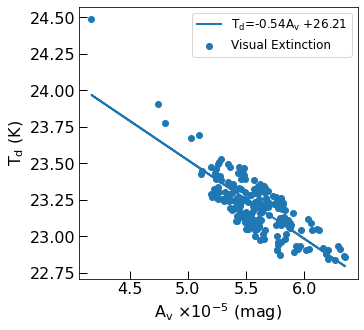

In [16]:
from scipy import stats
Av = df['Av']*10**5
fig,ax=plt.subplots(figsize=(5,5))
T = df['Td']

slope, intercept, r, p, std_err = stats.linregress(Av,T)


def myfunc(Av):
    return slope * Av + intercept

mymodel = list(map(myfunc, Av))

plt.scatter(Av,T)
plt.plot(Av,mymodel,linewidth=2)

plt.legend(["T$_{\mathregular{d}}$=-0.54A$_{\mathregular{v}}$ +26.21","Visual Extinction"],loc="upper right",prop={"size":12})

plt.xlabel(r'A$_{\mathregular{v}}$ $\times10^{-5}$ (mag)', fontsize=16)
plt.ylabel(r'T$_{\mathregular{d}}$ (K)', fontsize=16)
plt.xticks(color = 'k', fontsize=16)
plt.yticks(color = 'k', fontsize=16)
#ax.set_yticks([14.6, 14.9,15.2])
#ax.set_xticks([4.5, 6.0, 7.5])
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
#plt.text(4.2, 15.22, r'(b)', fontsize = 16)
plt.savefig('TFigl.png',bbox_inches='tight',dpi = 600)
print(slope)
print(intercept)
print(r)
print(p)
print(std_err)

plt.show()

In [17]:
df.describe()

h          m           s          RA           d         m.1  \
count  200.0  200.00000  200.000000  200.000000  200.000000  200.000000   
mean     4.0   38.72000   29.227200   69.801780   44.730000   19.615000   
std      0.0    0.75794   17.693744    0.169578    0.445074   23.201039   
min      4.0   37.00000    0.010000   69.436000   44.000000    0.000000   
25%      4.0   38.00000   13.590000   69.659458   44.000000    3.000000   
50%      4.0   39.00000   28.975000   69.798937   45.000000    8.000000   
75%      4.0   39.00000   45.262500   69.949406   45.000000   54.000000   
max      4.0   40.00000   59.980000   70.103500   45.000000   59.000000   

              s.1         DEC         F60        F100          Td  \
count  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    26.201000   45.064195    4.549389   22.153490   23.200885   
std     17.228526    0.088033    0.249222    0.718893    0.196075   
min      0.100000   44.876889    4.051400   20.901000   22.838878   
25%     10.500000   44.989583    4.365625   21.509000   23.081515   
50%     22.750000   45.051667    4.528500   22.166500   23.204056   
75%     39.850000   45.138542    4.704800   22.780000   23.292709   
max     59.700000   45.256361    5.845000   23.385000   24.487987   

                  B             M          Av  
count  2.000000e+02  2.000000e+02  200.000000  
mean   8.061341e-16  2.732409e+28    0.000056  
std    4.369863e-17  1.338126e+27    0.000003  
min    7.298215e-16  1.970421e+28    0.000042  
25%    7.798998e-16  2.665628e+28    0.000054  
50%    8.060603e-16  2.727378e+28    0.000056  
75%    8.253539e-16  2.814424e+28    0.000058  
max    1.116684e-15  3.005047e+28    0.000064

In [18]:
se=np.std(df['Av'])/np.sqrt(200)
se

2.0401663207422918e-07

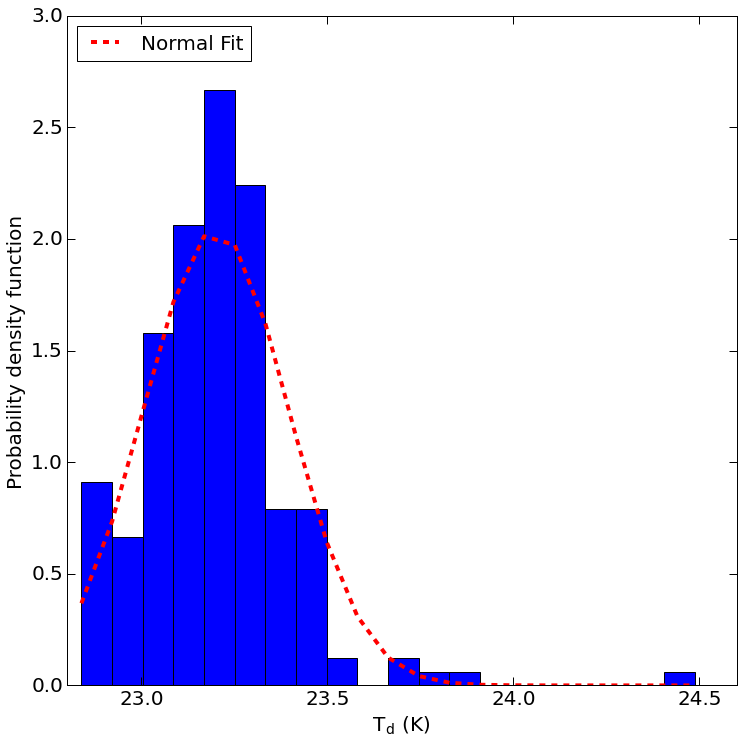

In [19]:
# importing required modules
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy import optimize as som
plt.style.use('classic')
%matplotlib inline
# histogarm with Gaussian fit of dust color temperature
np.random.seed(19680801)# fixing random state for reproducibility
mu = np.mean(df['Td'] )   # calculating the mean
sigma = np.std(df['Td']  )  # calculating the standard deviation
T = df['Td']  # x-axis
plt.figure(figsize=(12,12)) # defining the size of figure
n, bins, patches = plt.hist(T,  bins=20,density=True) # plotting a histogram
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5* (1 / sigma * (bins - mu))**2)) # Gaussian function
plt.plot(bins, y, '--',linewidth='4', c='r') # plotting a Gaussian fit
plt.legend(["Normal Fit"],loc='upper left',prop={"size":20}) # inserting a legend
plt.xlabel(r"T$_{\mathregular{d}}$ (K)",fontsize=20) #naming the X-axis
plt.ylabel("Probability density function",fontsize=20)
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
#plt.text(15.25, 3.3, r'b)', fontsize = 20)
plt.savefig('TAGT.png',bbox_inches='tight' )

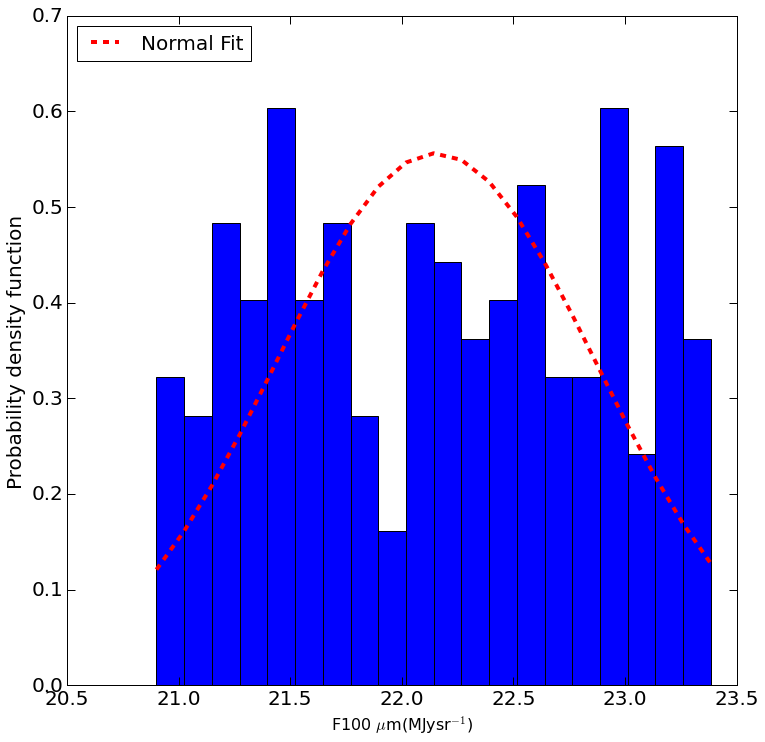

In [20]:
# histogarm with Gaussian fit of Flux density at 100 micron
mu = np.mean(df['F100'] )   # calculating the mean
sigma = np.std(df['F100']  )  # calculating the standard deviation
F100 = df['F100']  # x-axis
plt.figure(figsize=(12,12)) # defining the size of figure
n, bins, patches = plt.hist(F100,  bins=20,density=True) # plotting a histogram
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5* (1 / sigma * (bins - mu))**2)) # Gaussian function
plt.plot(bins, y, '--',linewidth='4',c='r') # plotting a Gaussian fit
plt.legend(["Normal Fit"],loc='upper left',prop={"size":20}) # inserting a legend
plt.xlabel(r"F100 $\mu$m(MJysr$^{-1}$)",fontsize=16) #naming the X-axis
plt.ylabel("Probability density function",fontsize=20)
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
#plt.text(45.25, 0.28, r'd)', fontsize = 20)
plt.savefig('TAGF100.png',bbox_inches='tight')

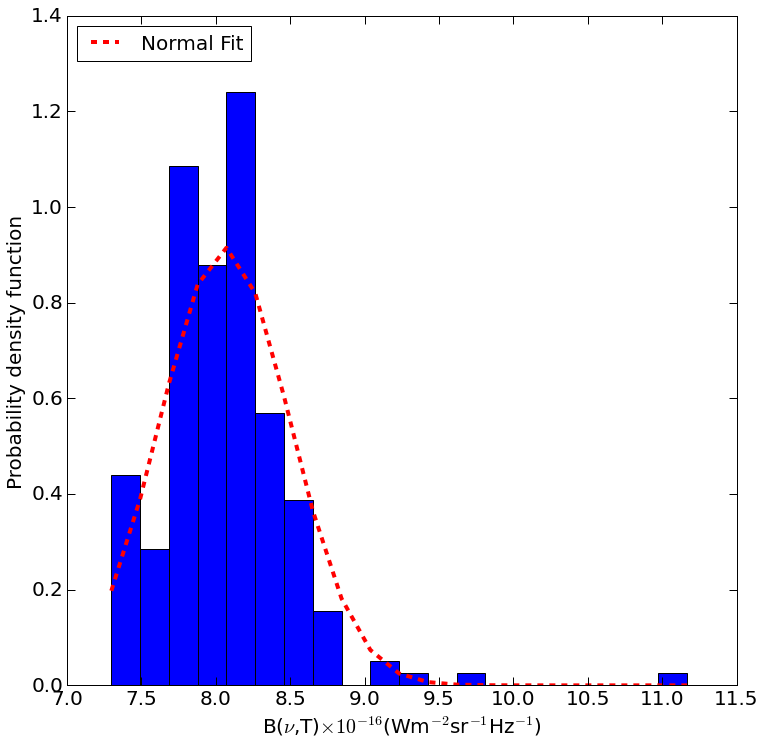

In [21]:
# histogarm with Gaussian fit of Planck's function
mu = np.mean(df['B']*10**16)   
sigma = np.std(df['B']*10**16)  
B= df['B']*10**16
plt.figure(figsize=(12,12))
n, bins, patches = plt.hist(B,  bins=20, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--',linewidth='4',c='r')
plt.legend(["Normal Fit"],loc='upper left',prop={"size":20})
plt.xlabel(r"B($\nu$,T)$\times 10^{-16}$(Wm$^{-2}$sr$^{-1}$Hz$^{-1}$)",fontsize=20)
plt.ylabel("Probability density function",fontsize=20)
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
#plt.text(1.75, 5.5, r'b)', fontsize = 20)
plt.savefig('TAGP.png',bbox_inches='tight')

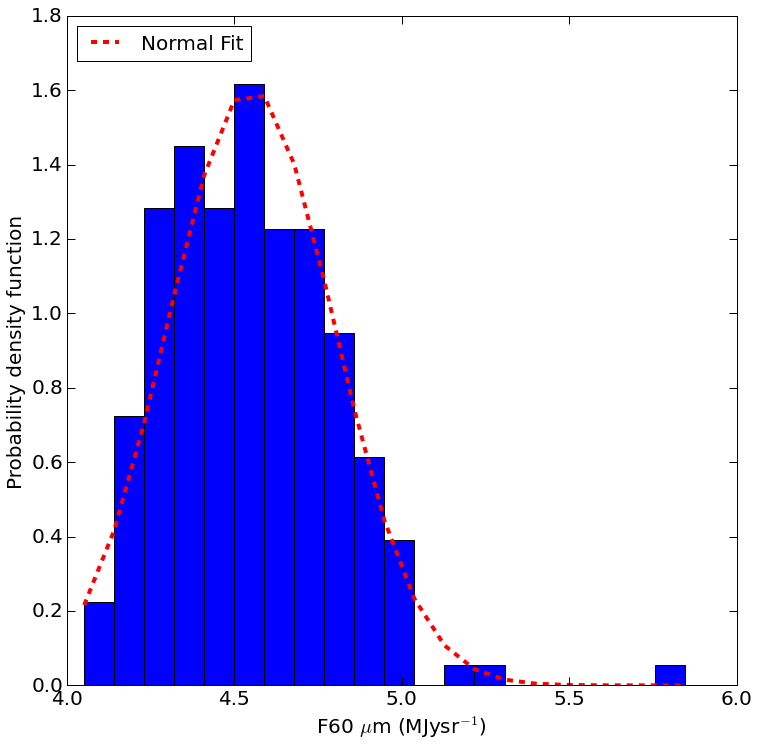

In [22]:
# histogarm with Gaussian fit of Flux density at 60 micron
mu = np.mean(df['F60'])   
sigma = np.std(df['F60'])  
F90= df['F60']
plt.figure(figsize=(12,12))
n, bins, patches = plt.hist(F60,  bins=20, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--',linewidth='4',c='r')
plt.legend(["Normal Fit"],loc='upper left',prop={"size":20})
plt.xlabel("F60 $\mu$m (MJysr$^{-1}$)",fontsize=20)
plt.ylabel("Probability density function",fontsize=20)
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
#plt.text(11.65, 1.55, r'c)', fontsize = 20)
plt.savefig('TAGF90.png',bbox_inches='tight')

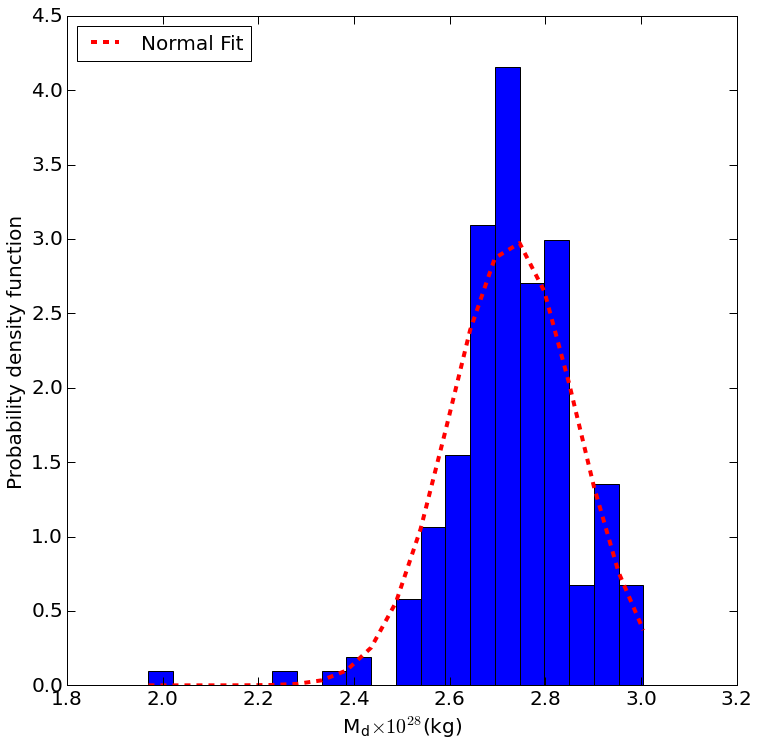

In [23]:

mu = np.mean(df['M']*10**-28)   
sigma = np.std(df['M']*10**-28)  
M = df['M']*10**-28
plt.figure(figsize=(12,12))
n, bins, patches = plt.hist(M,  bins=20, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
plt.plot(bins, y, '--',linewidth='4',c='r')
plt.legend(["Normal Fit"],loc='upper left',prop={"size":20})
plt.xlabel(r"M$_{\mathregular{d}}$$\times 10^{28}$(kg)",fontsize=20)
plt.ylabel("Probability density function",fontsize=20)
plt.xticks(color = 'k', fontsize=20)
plt.yticks(color = 'k', fontsize=20)
plt.tick_params(axis='x',length=8,width=1)
plt.tick_params(axis='y',length=8,width=1)
plt.tick_params(direction='in')
#plt.text(6.75, 1.1, r'(b)', fontsize = 20)
plt.savefig('TAGM.png',bbox_inches='tight')